Use gridsearch with cross validation to improve one of your previously submitted models (Homework 1) for each problem: regression, binary classification and multiclass classification. Select your parameters and scan their possible values properly (hint: use numpy). Report the test set score, best parameters, best cross-validation score and best estimator. What is the improvement with respect to the past results?

For your binary classification problem, use gridsearch and cross-validation with SVC. What is the best kernel? Print the heat map of mean cross-validation score (hint: use the mglearn library), the ROC curve and report the AUC value.

For your binary classification model, repeat the gridsearch with cross validation step using AUC as the evaluation metric. Do the result improves?

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

df_red = pd.read_csv('assigment_data/winequality-red.csv', sep=';')
df_white = pd.read_csv('assigment_data/winequality-white.csv', sep=';')
df_red['type'] = 1
df_white['type'] = 0
df = pd.concat([df_red, df_white])
from sklearn.utils import shuffle
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Regression: Use gridsearch with cross validation with ElasticNet model to the wine dataset. Can we improve our best training set 0.82 / test set 0.85 accuracies from exercise 1?

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

X = np.array(df.drop(['alcohol'], 1))
y = np.array(df['alcohol'])

In [19]:
# parameters we will tune are alpha & l1 ratio
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1], 
              'max_iter': [10000000]}
# 5 folds for KFold
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, return_train_score=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1], 'max_iter': [10000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.75
Best parameters: {'alpha': 0.0001, 'l1_ratio': 1, 'max_iter': 10000000}
Best cross-validation score: 0.85

Best estimator:
ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=10000000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [21]:
results = pd.DataFrame(grid_search.cv_results_)
best = results['mean_test_score'][results['rank_test_score'] == 1].iloc[0]
print("Mean test score of the rank 1 test score: {:.2f}".format(best))

Mean test score of the rank 1 test score: 0.85


### It seems the best test score is same as in the previous exercise, 0.85. Training set accuracy went up from 0.82 to 0.85.

### Multiclass classification: Use gridsearch with cross validation with KNeighborsClassifier model to the wine dataset. Can we improve our best training set 1 / test set 0.675 accuracies from exercise 1?

In [22]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier 
X = np.array(df.drop(['quality'], 1))
y = np.array(df['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNN works better with normalized values so scale X
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [23]:
# parameters we will tune are number of neighbours & leaf size
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 13, 15, 17, 20, 25, 30],
              'leaf_size': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
# 5 folds for StratifiedKFold
grid_search = GridSearchCV(KNeighborsClassifier(weights='distance', p=1), param_grid, return_train_score=True)
grid_search.fit(X_train, y_train)

C:\Users\inkah\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 4, 6, 8, 10, 13, 15, 17, 20, 25, 30], 'leaf_size': [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [24]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.65
Best parameters: {'leaf_size': 2, 'n_neighbors': 30}
Best cross-validation score: 0.63

Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=1,
           weights='distance')


In [25]:
results = pd.DataFrame(grid_search.cv_results_)
best = results['mean_test_score'][results['rank_test_score'] == 1].iloc[0]
print("Mean test score of the rank 1 test score: {:.2f}".format(best))

Mean test score of the rank 1 test score: 0.63


### in previous exercise we had test set accuracy of 0.675, here we have Mean test score of the rank 1 test score: 0.63

### For your binary classification problem, use gridsearch and cross-validation with SVC. What is the best kernel? Print the heat map of mean cross-validation score (hint: use the mglearn library), the ROC curve and report the AUC value.

### For your binary classification model, repeat the gridsearch with cross validation step using AUC as the evaluation metric. Do the result improves?

In [26]:
from sklearn.svm import SVC

X = np.array(df.drop(['type'], 1))
y = np.array(df['type'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
# we tried first with all kernel choices but after 1 hour of waiting, no result. Dropped to 3 options, and for the final
# kept only 2
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [65]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 7)

In [78]:
param_grid['gamma'] = [0.001, 0.01, 0.1, 1, 10, 100, 'linear kernel']

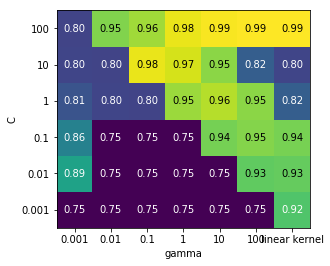

In [79]:
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'])

In [13]:
# what is the best kernel?
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.99
Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.99

Best estimator:
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


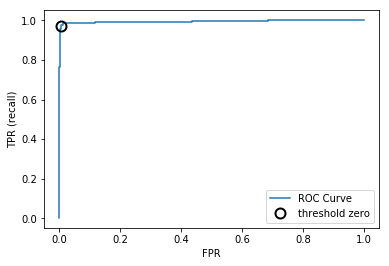

In [14]:
# print ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [19]:
#report the AUC value
from sklearn.metrics import roc_auc_score
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid_search.decision_function(X_test))))

Test set AUC: 0.998


### For your binary classification model, repeat the gridsearch with cross validation step using AUC as the evaluation metric. Do the result improves?

In [21]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="roc_auc", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [22]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid_search.decision_function(X_test))))

Test set score: 1.00
Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.99

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Test set AUC: 0.998


### The result is very similar. With AUC as the evaluation metric, C=100 is chosen as the best parameter with linear kernel
First:
Test set score: 0.99
Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.99
Test set AUC: 0.998

Second with scoring="roc_auc":
Test set score: 1.00
Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.99
Test set AUC: 0.998